# Data Visualization Project Part3 - Viz for Others


    Dataset Name   : Greenhouse Report - State of Washington 
    Dataset Format : CSV
    Dataset Source : https://catalog.data.gov/dataset/2015-greenhouse-gas-report-data
    Dataset URL    : https://catalog.data.gov/dataset/2015-greenhouse-gas-report-data/resource/20b553e7-7c97-4a07-bbce-025c2801f7a2
    Dataset AcessInfo: Public: This dataset is intended for public access and use.
                       Non-Federal: This dataset is covered by different Terms of Use than Data.gov.
                       License: No license information was provided.
    Dataset size   : 27KB- 142 -rows columns-18

    Group project Members:

    Nihit Hindlekar
    Samuel John
    Shamini Hilda Samuvel Mani
    Srijith Srinath

In [1]:
%matplotlib inline

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ipywidgets as pw
import traitlets
import bqplot
import folium
from folium.plugins.beautify_icon import BeautifyIcon

sns.set(style = "darkgrid", color_codes=True)

In [3]:
df = pd.read_csv("2015_Greenhouse_Gas_Report-_Data.csv")
tempdf =  pd.read_csv("2015_Greenhouse_Gas_Report-_Data.csv")

In [4]:
xyz = df["Location (Latitude, Longitude) "]
xyz = xyz.map(lambda x: x.lstrip('(').rstrip(')'))
temp = xyz.str.split(expand=True)
temp[0] = temp[0].map(lambda x: x.rstrip(','))

In [5]:
df["Latitude"] = temp[0]
df["Longitude"] = temp[1]
df["Latitude"] = pd.to_numeric(df["Latitude"])
df["Longitude"] = pd.to_numeric(df["Longitude"])

In [6]:
del df["Location (Latitude, Longitude) "]

In [7]:
df

,Source,County,Address,Total Emissions (MT CO2e),Biogenic CO2 (MT CO2),Fossil CO2 (MT CO2),Methane (MT CO2e),Nitrous Oxide (MT CO2e),Hydrofluorocarbons (MT CO2e),Perfluorocarbons (MT CO2e),Sulfur Hexafluoride (MT CO2e),Other (MT CO2e),Sector,Sub Sector,Clean Air Rule,"Energy-Intensive, Trade-Exposed",Point Size- Based on Total Emissions,Latitude,Longitude
0,Agrium Kennewick Fertilizer Operations (KFO) -...,Benton,"227515 E. Bowles Rd Kennewick, WA 99337",155888,0,10731,1,145157,0,0,0,0,Chemicals,Nitric Acid Production,YES,YES,3,46.165957,-119.017218
1,Air Liquide Hydrogen Plant - Anacortes,Skagit,"8581 South Texas Road Anacortes, WA 98221",64413,0,64413,0,0,0,0,0,0,Chemicals,Hydrogen Production,NO,NO,2,48.465617,-122.556032
2,Alcoa Intalco Works - Ferndale,Whatcom,"4050 Mountain View Road Ferndale, WA 98248",1195786,0,418042,10480,34,0,767230,0,0,Metals,Aluminum Production,YES,YES,4,48.845500,-122.705500
3,Alcoa Wenatchee Works - Malaga,Chelan,"6200 Malaga/Alcoa Hwy. Malaga, WA 98828",331207,0,254025,14,16,0,77152,0,0,Metals,Aluminum Production,YES,YES,3,47.356700,-120.127300
4,Ardagh Glass Inc. - Seattle,King,"5801 East Marginal Way South Seattle, WA 98134",76674,0,76614,27,32,0,0,0,0,Minerals,Glass Production,YES,NO,2,47.552420,-122.337390
5,Ash Grove Cement Company - Seattle,King,"3801 E. Marginal Way South Seattle, WA 98134",495030,0,494557,369,104,0,0,0,0,Minerals,Cement Production,YES,YES,3,47.567990,-122.342550
6,"Biofuels Washington, LLC Landfill Gas to Energ...",Pierce,"30919 Meridian Ave, East Graham, WA 98338",19534,19435,0,30,70,0,0,0,0,Power Plants,"Other Power, Heating, or Cooling Plants",NO,NO,1,46.975533,-122.290871
7,Boeing Commercial Airplanes - Everett,Snohomish,"3003 West Casino Rd Everett, WA 98204",66276,0,66207,31,37,0,0,0,0,Manufacturing,Transportation,YES,YES,2,47.918622,-122.276987
8,Boeing Commercial Airplanes - Fabrication (Fre...,Pierce,"18001 Canyon Rd E Puyallup, WA 98375",20833,0,20812,10,12,0,0,0,0,Manufacturing,Transportation,NO,YES,1,47.088831,-122.348620
9,"Boise Cascade Wood Products, LLC. Kettle Fall...",Stevens,"610 West 3rd Avenue Kettle Falls, WA 99141",57294,56539,0,109,647,0,0,0,0,Wood Products,Lumber Mills,NO,NO,2,48.609799,-118.067441


**Dataset Description**

The dataset describes the Greenhouse Gas (GHG) emissions of 141 organizations from the state of Washington. It provides the county, sector, sub-sector, longitude, latitude and emission details of each of these companies. 

In [8]:
business = {}

m = folium.Map(location = [47.7511, -120.7401], tiles="cartodbpositron", zoom_start=7)
for i in range(0,len(df)):
    business[i] = BeautifyIcon(icon='building', border_color='#bababa', text_color='#4d4d4d', icon_shape='circle')
    folium.Marker([df.iloc[i]['Latitude'], df.iloc[i]['Longitude']], popup = df.iloc[i]['Source'],
                 icon = business[i]).add_to(m)
m

**Green House gases-Sources**

The above visualization shows the location of 141 sources in the state of Washington that contributes to green house gases emission. Name of the source can be found by hovering over the marker. 

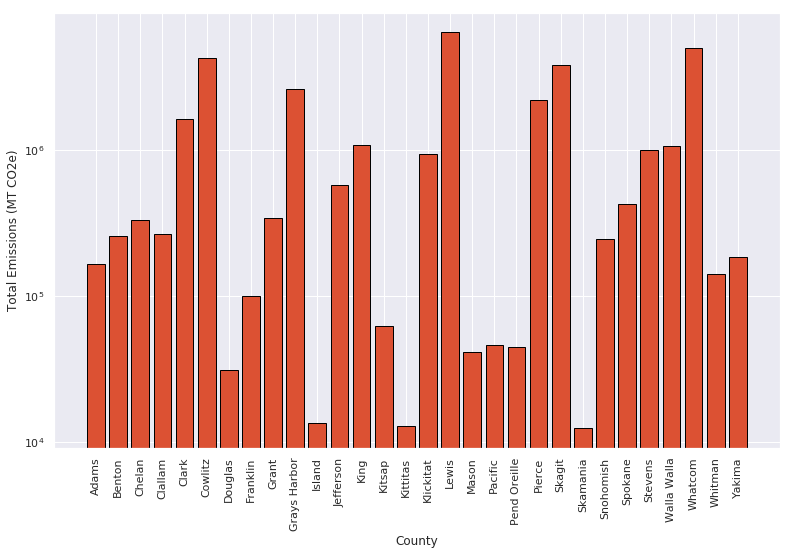

In [155]:
county_total_emission = df.groupby("County")["Total Emissions (MT CO2e)"].sum()
temp = pd.DataFrame(county_total_emission)

plt.rcParams['figure.figsize'] = 13,8
plt.bar(temp.index,temp['Total Emissions (MT CO2e)'], color = '#DC5133', edgecolor='black')
plt.xticks(rotation = 90)
plt.xlabel("County")
plt.ylabel("Total Emissions (MT CO2e)")
plt.yscale("log")

**Total Emissions at County Level**

The above visualization shows a bar plot between Total Emissions vs County data, where the total emissions of each of the companies are grouped according to the county they belong to. The total emissions is calculated by aggregating the total emissions of all the companies in that particular county. Also, the values have been tranformed using a log scale for better visualization.

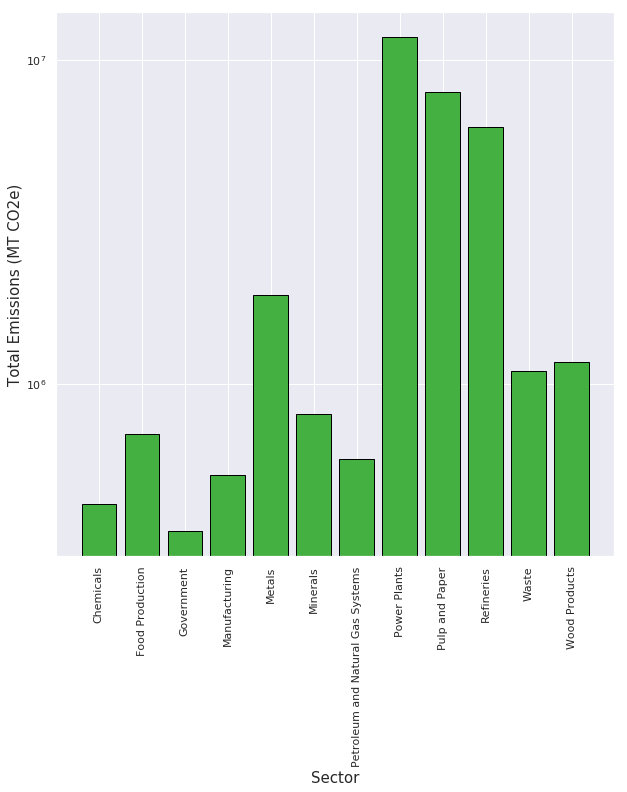

In [10]:
sector_total_emission = df.groupby("Sector ")["Total Emissions (MT CO2e)"].sum()
temp1 = pd.DataFrame(sector_total_emission)
plt.rcParams['figure.figsize'] = 10,10
plt.bar(temp1.index,temp1['Total Emissions (MT CO2e)'], color = '#45B042', edgecolor='black')
plt.xticks(rotation = 90)
plt.xlabel("Sector", fontsize = 15)
plt.ylabel("Total Emissions (MT CO2e)", fontsize = 15)
plt.yscale("log")

**Total Emissions at Sector Level**

The above visualization shows a bar plot between Total Emissions vs Sector data, where the total emissions of each of the companies are grouped according to the sector they belong to. The total emissions is calculated by aggregating the total emissions of all the companies in that particular Sector. Also, the values have been tranformed using a log scale for better visualization.

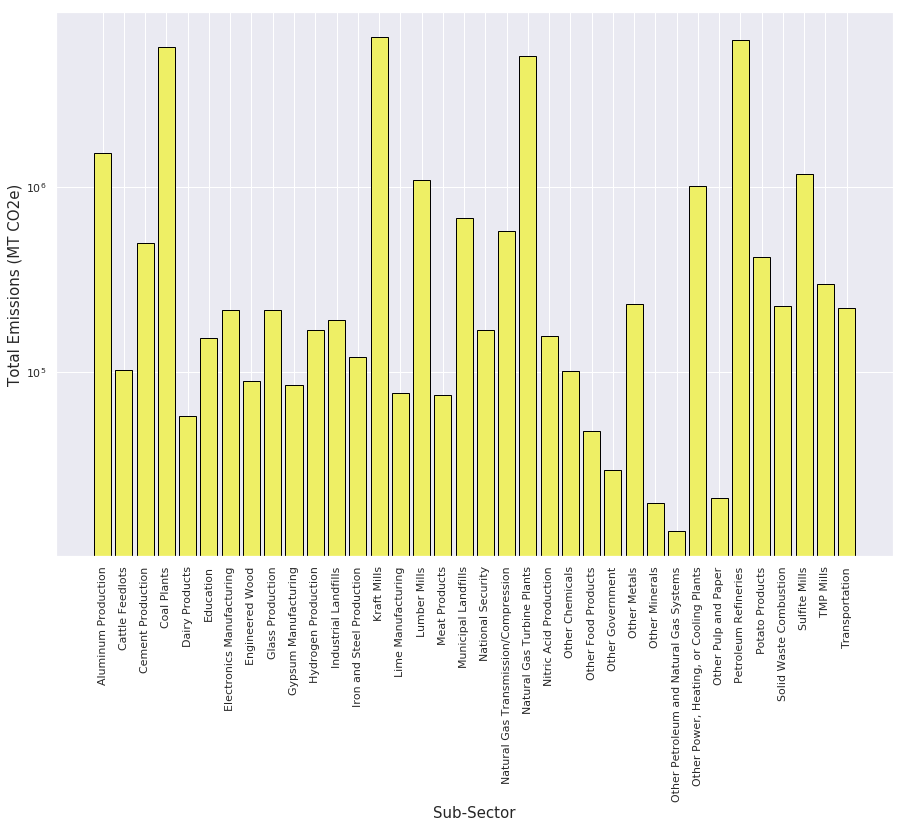

In [11]:
subsector_total_emission = df.groupby("Sub Sector")["Total Emissions (MT CO2e)"].sum()
temp2 = pd.DataFrame(subsector_total_emission)
plt.rcParams['figure.figsize'] = 15,10
plt.bar(temp2.index,temp2['Total Emissions (MT CO2e)'], color = '#EEEF65', edgecolor='black')
plt.xticks(rotation = 90)
plt.xlabel("Sub-Sector", fontsize = 15)
plt.ylabel("Total Emissions (MT CO2e)", fontsize = 15)
plt.yscale("log")

**Total Emissions at Sub-Sector Level**

The above visualization shows a bar plot between Total Emissions vs Sub-Sector data, where the total emissions of each of the companies are grouped according to the Sub-Sector they belong to. The total emissions is calculated by aggregating the total emissions of all the companies in that particular Sub-Sector. Also, the values have been tranformed using a log scale for better visualization.

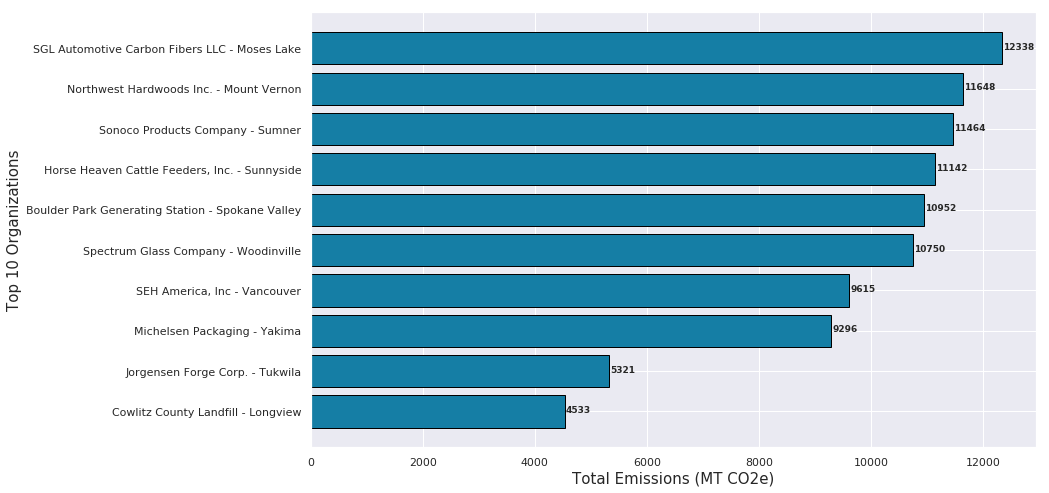

In [160]:
company = pd.DataFrame(df.groupby("Source")["Total Emissions (MT CO2e)"].sum())
company_emission = company.sort_values(by='Total Emissions (MT CO2e)')
top_ten_companies = company_emission.iloc[0:10]
vals4 = top_ten_companies["Total Emissions (MT CO2e)"].values

plt.barh(top_ten_companies.index.values,top_ten_companies["Total Emissions (MT CO2e)"],color = '#157EA5', edgecolor='black')
plt.xlabel("Total Emissions (MT CO2e)", fontsize = 15)
plt.ylabel("Top 10 Organizations", fontsize = 15)

for i, v in enumerate(vals4):
    plt.text(v + 20, i - .02, str(v), fontsize = 9, fontweight='bold')

**Total Emissions of Top 10 Organizations**

The above horizontal bar chart shows the total emissions of top 10 Organizations. Here the data is sorted based on the total emissions value, then the top 10 Organizations are listed in the bar chart.

Text(0, 0.5, 'Number of Organisations')

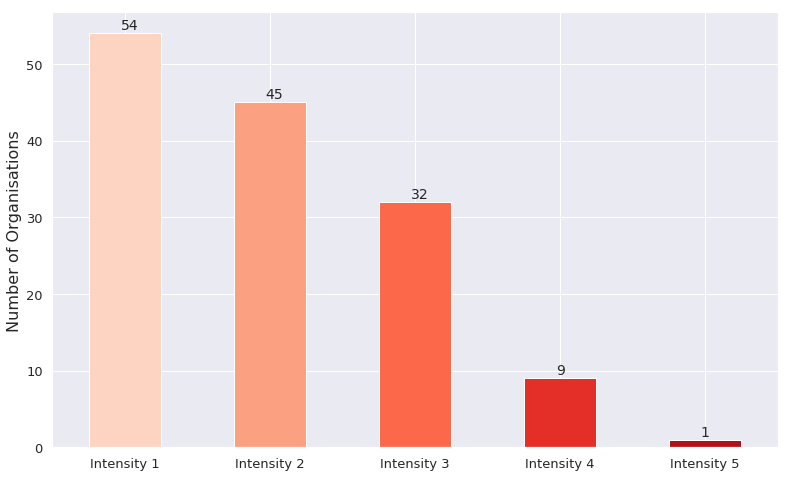

In [164]:
objects = ("Intensity 1","Intensity 2","Intensity 3","Intensity 4","Intensity 5")
pos = np.arange(len(objects))
freq = df['Point Size- Based on Total Emissions'].value_counts()
ax = df['Point Size- Based on Total Emissions'].value_counts().plot(kind='bar',
                                                  color = sns.color_palette("Reds", len(objects)), fontsize=13)
for i in ax.patches:
    plt.text(i.get_x()+.22, i.get_height()+.5, i.get_height(), fontsize = 14)
    
plt.xticks(pos, objects, rotation = 360)
plt.ylabel('Number of Organisations', fontsize = 16)

In [45]:
dicts = {}

maps = folium.Map(location = [47.7511, -120.7401], tiles="Stamen Terrain", zoom_start=7)
for i in range(0,len(df)):
    if(df.iloc[i]['Point Size- Based on Total Emissions'] == 1):
        dicts[i] = BeautifyIcon(border_color='#fee5d9', text_color='#fee5d9', number=1,inner_icon_style='margin-top:0;')
        folium.Marker([df.iloc[i]['Latitude'], df.iloc[i]['Longitude']], 
                      popup = df.iloc[i]['Source'], icon = dicts[i]).add_to(maps)
    if(df.iloc[i]['Point Size- Based on Total Emissions'] == 2):
        dicts[i] = BeautifyIcon(border_color='#fcae91', text_color='#fcae91', number=2,inner_icon_style='margin-top:0;')
        folium.Marker([df.iloc[i]['Latitude'], df.iloc[i]['Longitude']], 
                      popup = df.iloc[i]['Source'], icon = dicts[i]).add_to(maps)
    if(df.iloc[i]['Point Size- Based on Total Emissions'] == 3):
        dicts[i] = BeautifyIcon(border_color='#fb6a4a', text_color='#fb6a4a', number=3,inner_icon_style='margin-top:0;')
        folium.Marker([df.iloc[i]['Latitude'], df.iloc[i]['Longitude']], 
                      popup = df.iloc[i]['Source'], icon = dicts[i]).add_to(maps)
    if(df.iloc[i]['Point Size- Based on Total Emissions'] == 4):
        dicts[i] = BeautifyIcon(border_color='#de2d26', text_color='#de2d26', number=4,inner_icon_style='margin-top:0;')
        folium.Marker([df.iloc[i]['Latitude'], df.iloc[i]['Longitude']], 
                      popup = df.iloc[i]['Source'], icon = dicts[i]).add_to(maps)
    if(df.iloc[i]['Point Size- Based on Total Emissions'] == 5):
        dicts[i] = BeautifyIcon(border_color='#a50f15', text_color='#a50f15', number=5,inner_icon_style='margin-top:0;')
        folium.Marker([df.iloc[i]['Latitude'], df.iloc[i]['Longitude']], 
                      popup = df.iloc[i]['Source'], icon = dicts[i]).add_to(maps)

In [46]:
maps

**Number of Organizations based on Intensity**

First visualization is a histogram that bins the organizations based on the intensity level. There are 5 intensity levels with 1 being the lowest and 5 the highest.

In the second visualization,squares in the map represent the sources' location and its intensity level, which is differentiated in shades of red similar to the above histogram. 



In [47]:
choose_county = pw.Dropdown(description = "Choose County",
                          options = ['Adams', 'Benton', 'Chelan', 'Clallam', 'Clark', 'Cowlitz',
                                    'Douglas', 'Franklin', 'Grant', 'Grays Harbor', 'Island',
                                    'Jefferson', 'King', 'Kitsap', 'Kittitas', 'Klickitat', 'Lewis',
                                    'Mason', 'Pacific', 'Pend Oreille', 'Pierce', 'Skagit', 'Skamania',
                                    'Snohomish', 'Spokane', 'Stevens', 'Walla Walla', 'Whatcom',
                                    'Whitman', 'Yakima'],
                          value = "Grant"
                         )

biogenic = df.groupby("County")["Biogenic CO2 (MT CO2)"].sum()
fossil = df.groupby("County")["Fossil CO2 (MT CO2)"].sum()
methane = df.groupby("County")["Methane (MT CO2e)"].sum()
nitrous = df.groupby("County")["Nitrous Oxide (MT CO2e)"].sum()

def change_county(change):
    x = biogenic[choose_county.value]
    y = fossil[choose_county.value]
    z = methane[choose_county.value]
    u = nitrous[choose_county.value]
    marks = (x,y,z,u)
    scatters.x = labels
    scatters.y = marks

labels = ("Biogenic CO2 (MT CO2)","Fossil CO2 (MT CO2)","Methane (MT CO2e)","Nitrous Oxide (MT CO2e)")
x = biogenic["Grant"]
y = fossil["Grant"]
z = methane["Grant"]
u = nitrous["Grant"]
marks = [x,y,z,u]

choose_county.observe(change_county)

x_sc = bqplot.OrdinalScale()
y_sc = bqplot.LinearScale()

x_ax = bqplot.Axis(scale = x_sc, label = "Different Gases")
y_ax = bqplot.Axis(scale = y_sc , label = "Amount", orientation = 'vertical')

tooltip = bqplot.Tooltip(fields = ["x","y"])

scatters = bqplot.Scatter(x = labels,
                         y = marks,
                         scales = {'x': x_sc, 'y': y_sc},
                         tooltip = tooltip,
                         colors=['#3182BD'], stroke='black')
fig = bqplot.Figure(marks = [scatters],axes =[x_ax, y_ax])

In [48]:
display(choose_county)
display(fig)

Dropdown(description='Choose County', index=8, options=('Adams', 'Benton', 'Chelan', 'Clallam', 'Clark', 'Cowl…

Figure(axes=[Axis(label='Different Gases', scale=OrdinalScale(), side='bottom'), Axis(label='Amount', orientat…

**Different Gases vs Amount at County Level**

In the above visualization, scatter plot shows the amount of different gases(like Biogenic CO2, Fossil CO2, Methane, Nitrous Oxide) emitted based on the county selected from the drop down list.

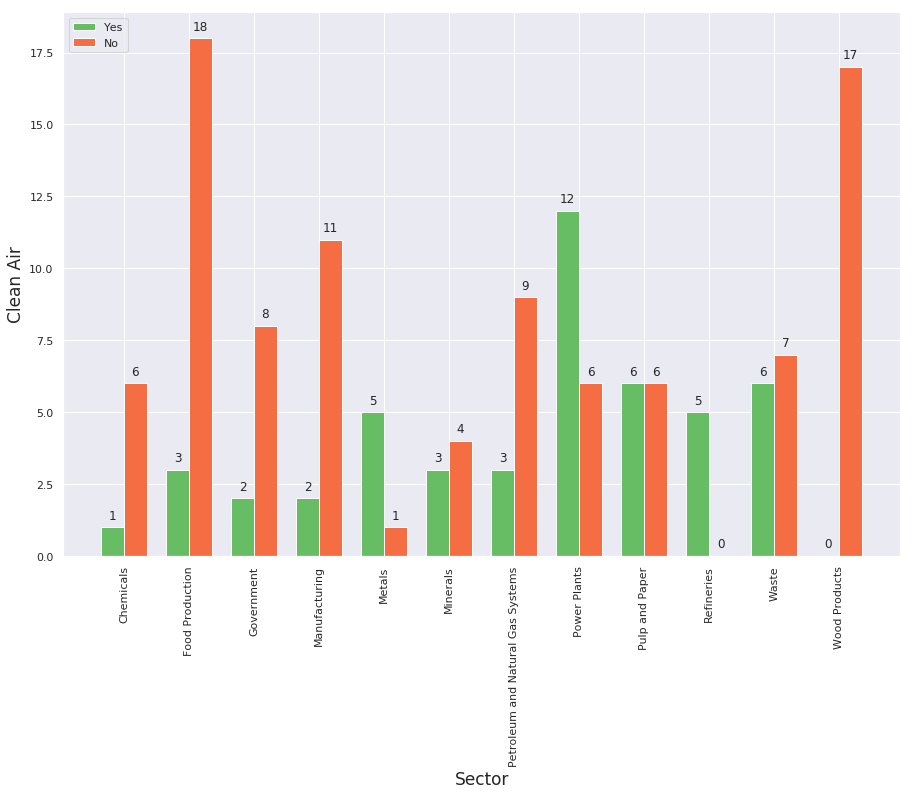

In [49]:
yes = df.loc[df["Clean Air Rule "] == 'YES', ["Sector ", "Clean Air Rule "]]
yes1= pd.DataFrame(yes.groupby("Sector ")["Clean Air Rule "].count())

no = df.loc[df["Clean Air Rule "] == 'NO', ["Sector ", "Clean Air Rule "]]
no1= pd.DataFrame(no.groupby("Sector ")["Clean Air Rule "].count())

sector = np.unique(df["Sector "])
sector = np.sort(sector)

clean_air_rule = pd.merge(yes1, no1, left_on=yes1.index.values, right_on=no1.index.values,how = "outer")
clean_air_rule.fillna(0, inplace=True)
count_yes = clean_air_rule.values

def autolabel(rects, xpos='center'):
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        label_position = height + (y_height * 0.01)
        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')

width = 0.35
ind = np.arange(len(count_yes))

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, clean_air_rule["Clean Air Rule _x"], width, color='#66bd63', label='Yes')
rects2 = ax.bar(ind + width/2, clean_air_rule["Clean Air Rule _y"], width, color='#f46d43', label='No')
ax.set_xlabel('Sector', fontsize = 17)
ax.set_ylabel('Clean Air', fontsize = 17)
ax.set_xticks(ind)
ax.set_xticklabels(clean_air_rule["key_0"])
plt.xticks(rotation = 90)
ax.legend(loc = 2)

autolabel(rects1, "left")
autolabel(rects2, "right")

**Sector Vs Clean Air**

The above plot shows various sector and their respective "Clean Air Rule" - state regulation compliance count. 
Higher the "yes" count, there is a good chance that the sector complies with the state's "Clean Air Rule".


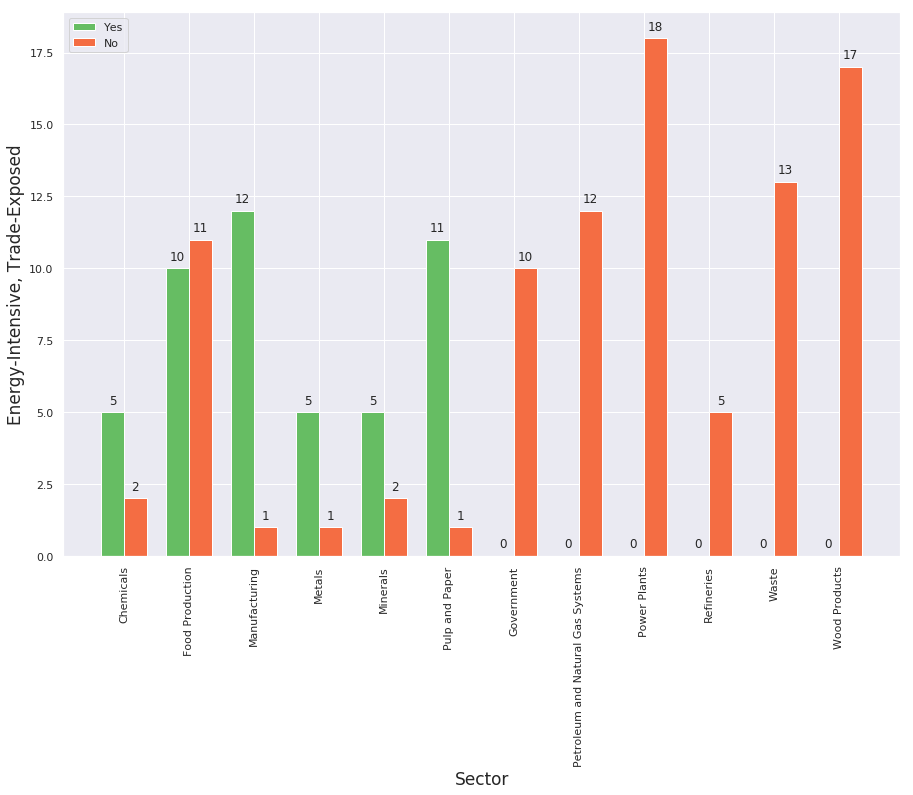

In [50]:
yes = df.loc[df['Energy-Intensive, Trade-Exposed '] == 'YES', ['Sector ', 'Energy-Intensive, Trade-Exposed ']]
yes_energy = pd.DataFrame(yes.groupby('Sector ')['Energy-Intensive, Trade-Exposed '].count())

no = df.loc[df['Energy-Intensive, Trade-Exposed '] == 'NO', ['Sector ', 'Energy-Intensive, Trade-Exposed ']]
no_energy = pd.DataFrame(no.groupby('Sector ')['Energy-Intensive, Trade-Exposed '].count())

Energy_Intensive_rule = pd.merge(yes_energy, no_energy, left_on= yes_energy.index.values, right_on= no_energy.index.values,how='outer')
Energy_Intensive_rule.fillna(0, inplace=True)

count_yes_energy = Energy_Intensive_rule.values

def autolabel(rects, xpos='center'):
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        label_position = height + (y_height * 0.01)
        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')

width = 0.35
ind = np.arange(len(count_yes_energy))

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, Energy_Intensive_rule["Energy-Intensive, Trade-Exposed _x"], width, color='#66bd63', label='Yes')
rects2 = ax.bar(ind + width/2, Energy_Intensive_rule["Energy-Intensive, Trade-Exposed _y"], width, color='#f46d43', label='No')
ax.set_xlabel('Sector', fontsize = 17)
ax.set_ylabel('Energy-Intensive, Trade-Exposed', fontsize = 17)
ax.set_xticks(ind)
ax.set_xticklabels(Energy_Intensive_rule["key_0"])
plt.xticks(rotation = 90)
ax.legend(loc = 2)

autolabel(rects1, "left")
autolabel(rects2, "right")

**Sector Vs "Energy-Intensive, Trade-Exposed"**

The above plot shows various sector and whether they belong to the "Energy-Intensive,Trade-Exposed" category or not.
Greater the count of yes- there is a high chance that a particular sector belongs to "Energy-Intensive,Trade-Exposed" category and vice versa.
